In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
X = np.arange(1, 20)
y = X**2 + 1
X_original = X.reshape(-1, 1) 

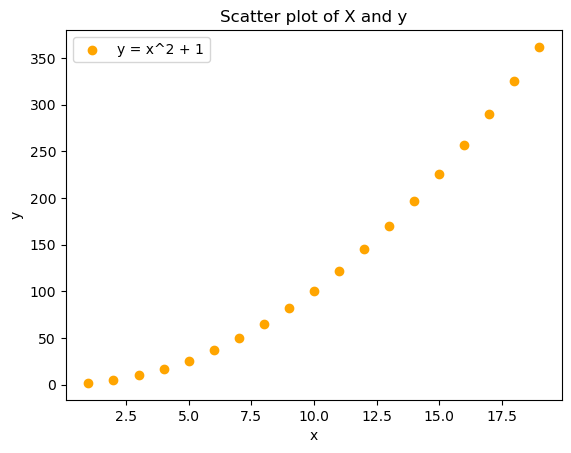

In [38]:
plt.scatter(X_original, y, color = 'orange', label = "y = x^2 + 1")
plt.title("Scatter plot of X and y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [22]:
X_train = np.hstack((X_original, X_original**2))

In [26]:
def standardize(x):
    mean = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    X_norm = (x - mean)/sigma
    return mean, sigma, X_norm

In [30]:
mean, sigma, X_norm = standardize(X_train)

In [40]:
def cost_function(x, y, w, b):
    m = len(y)
    f_wb = x.dot(w) + b
    error = f_wb - y
    cost = 1/(2*m) + np.sum(error ** 2)

    return cost

In [42]:
def gradient_function(x, y, w, b):
    m = len(y)
    f_wb = x.dot(w) + b
    error = f_wb - y
    dj_dw = 1/m * x.T.dot(error)
    dj_db = 1/m * np.sum(error)

    return dj_dw, dj_db

In [44]:
def gradient_descent(x, y, w_in, b_in, a, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= a * dj_dw
        b -= b * dj_db

        J_history.append(cost_function(x, y, w, b))
        if i % math.ceil(num_iters/10) == 0:
            print(f"iteration: {i:5}, cost: {J_history[-1]}")

    return w, b, J_history

In [96]:
m, n = X_train.shape
w_initial = np.zeros(n, dtype = "float64")
b_initial = 0
alpha = 1.0
iterations = 1000000
w_final, b_final, cost_history = gradient_descent(X_norm, y, w_initial, b_initial, alpha, 
                                                  iterations, cost_function, gradient_function)
print(f"Final value of w is: {w_final.flatten()}")
print(f"Final value of b is: {b_final}")

iteration:     0, cost: 554059.0263157893
iteration: 100000, cost: 326059.0263157895
iteration: 200000, cost: 326059.0263157895
iteration: 300000, cost: 326059.0263157895
iteration: 400000, cost: 326059.0263157895
iteration: 500000, cost: 326059.0263157895
iteration: 600000, cost: 326059.0263157895
iteration: 700000, cost: 326059.0263157895
iteration: 800000, cost: 326059.0263157895
iteration: 900000, cost: 326059.0263157895
Final value of w is: [1.36073954e-15 1.12756375e+02]
Final value of b is: 0.0


Text(0, 0.5, 'y')

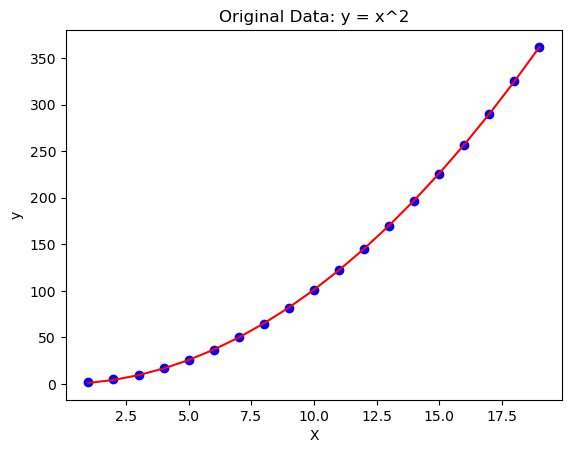

In [88]:
y_pred = X_train.dot(w_final) + b_final
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color = 'red')
plt.title("Original Data: y = x^2")
plt.xlabel("X")
plt.ylabel("y")